In [1]:
# Primetrade.ai - Trading Analytics & Predictive Modeling
# Comprehensive analysis of trading data with market sentiment integration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_style("whitegrid")

# Trading Analytics & Predictive Models - Primetrade.ai

## Project Overview
Analyzing historical trading data with market sentiment indicators to build predictive models for trade outcomes and provide actionable business insights.

---

# 📊 SECTION I: DATA ANALYTICS

Comprehensive exploratory analysis of trading patterns, market sentiment, and trader behavior.

## Part A: Data Loading & Preparation

In [2]:
sentiment=pd.read_csv("fear_greed_index.csv")
trades=pd.read_csv("historical_data.csv")

## Step 1: Load Raw Data

In [3]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
sentiment.classification.value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [5]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
sentiment = sentiment[["date", "classification"]]
trades = trades[['Account', 'Coin', 'Execution Price', 
     'Size Tokens', 'Size USD', 
     'Side', 'Timestamp IST', 'Closed PnL']]

In [9]:
print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)

print("\nMissing Values (Sentiment):\n", sentiment.isna().sum())
print("\nMissing Values (Trades):\n", trades.isna().sum())

print("\nDuplicates (Sentiment):", sentiment.duplicated().sum())
print("Duplicates (Trades):", trades.duplicated().sum())

Sentiment Shape: (2644, 2)
Trades Shape: (211224, 8)

Missing Values (Sentiment):
 date              0
classification    0
dtype: int64

Missing Values (Trades):
 Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Timestamp IST      0
Closed PnL         0
dtype: int64

Duplicates (Sentiment): 0
Duplicates (Trades): 21182


In [10]:
print(type(sentiment["date"].iloc[0]))
print(type(trades["Timestamp IST"].iloc[0]))

<class 'str'>
<class 'str'>


In [11]:
# Start fresh
trades_df = trades.copy()
sentiment_df = sentiment.copy()

# --------------------------
# Fix trades timestamp
# --------------------------
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    dayfirst=True
)

trades_df['date'] = trades_df['Timestamp IST'].dt.normalize()

# --------------------------
# Fix sentiment date
# --------------------------
sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'],
    format="%Y-%m-%d"
)

# --------------------------
# Verify
# --------------------------
print("Trades dtype:", trades_df['date'].dtype)
print("Sentiment dtype:", sentiment_df['date'].dtype)

Trades dtype: datetime64[ns]
Sentiment dtype: datetime64[ns]


In [12]:
print(trades_df['date'].dtype)
print(sentiment_df['date'].dtype)

datetime64[ns]
datetime64[ns]


In [13]:
print(trades_df['date'].dt.tz)
print(sentiment_df['date'].dt.tz)

None
None


In [14]:
# # Convert properly
# trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True).dt.date
# sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# # Filter sentiment only for trade dates
# sentiment_overlap = sentiment[sentiment['date'].isin(trades_df['date'])]

# print(sentiment_overlap['classification'].value_counts())

In [15]:
cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL']
for col in cols:
    trades_df.loc[:, col] = pd.to_numeric(trades_df[col], errors='coerce')

In [16]:
merged = trades_df.merge(
    sentiment_df[["date", "classification"]],
    on="date",
    how="left"
)

print("Merged Shape:", merged.shape)
merged.head()

Merged Shape: (211224, 10)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Closed PnL,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.0,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,0.0,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,0.0,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,0.0,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,0.0,2024-12-02,Extreme Greed


In [17]:
print("Merged Shape:", merged.shape)

print("\nSentiment Distribution After Merge:")
print(merged['classification'].value_counts())

print("\nMissing Sentiment Values:")
print(merged['classification'].isnull().sum())

Merged Shape: (211224, 10)

Sentiment Distribution After Merge:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Missing Sentiment Values:
6


## Step 2: Data Cleaning & Preprocessing

In [18]:
merged.classification.value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

## Part B: Exploratory Data Analysis (EDA)

## 1. Performance Analysis - PnL by Sentiment

1. Daily PnL Per Trader

Average Daily PnL by Sentiment:
 classification
Extreme Fear     52793.589178
Extreme Greed    23817.292199
Fear             36891.818040
Greed            11140.566181
Neutral          19297.323516
Name: Closed PnL, dtype: float64


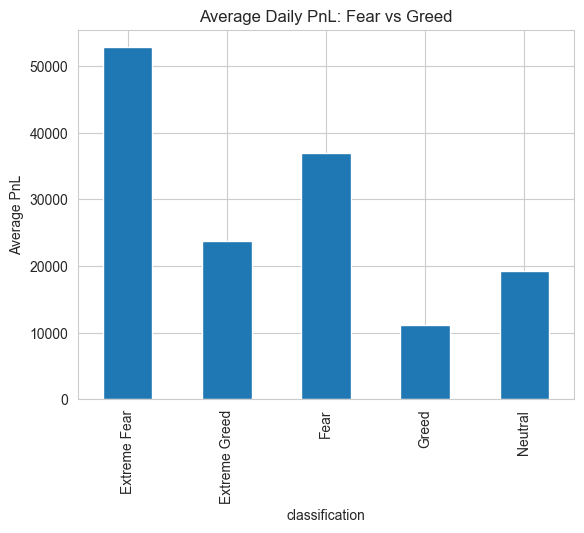

In [19]:
import matplotlib.pyplot as plt

# Daily total PnL
daily_sentiment_pnl = merged.groupby(['date', 'classification'])['Closed PnL'].sum().reset_index()

# Average daily PnL by sentiment
avg_pnl = daily_sentiment_pnl.groupby('classification')['Closed PnL'].mean()

print("Average Daily PnL by Sentiment:\n", avg_pnl)

# Plot
avg_pnl.plot(kind='bar')
plt.title("Average Daily PnL: Fear vs Greed")
plt.ylabel("Average PnL")
plt.show()

- Win Rate (Per Trader)

Win Rate by Sentiment:
 classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


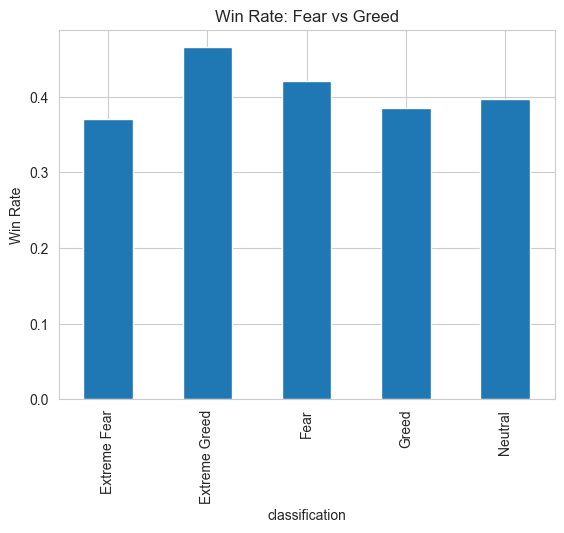

In [20]:
merged['win'] = merged['Closed PnL'] > 0

win_rate_sentiment = merged.groupby('classification')['win'].mean()

print("Win Rate by Sentiment:\n", win_rate_sentiment)

win_rate_sentiment.plot(kind='bar')
plt.title("Win Rate: Fear vs Greed")
plt.ylabel("Win Rate")
plt.show()

🔹 Drawdown Proxy

Average Loss (Drawdown Proxy):
 classification
Extreme Fear    -257.099629
Extreme Greed   -119.920289
Fear            -156.662401
Greed           -181.967329
Neutral         -121.727849
Name: Closed PnL, dtype: float64


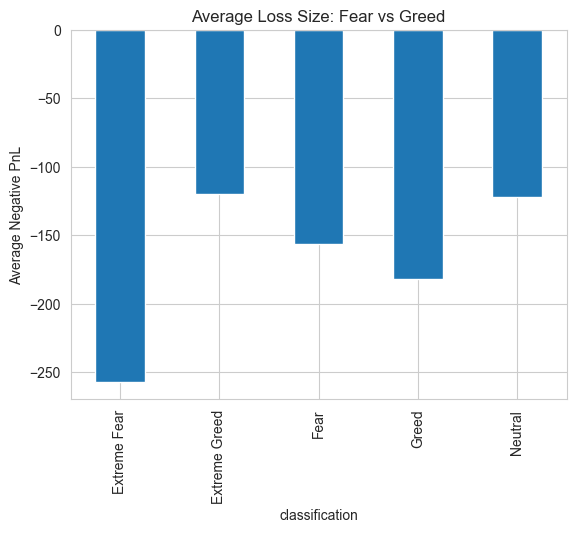

In [21]:
drawdown = merged[merged['Closed PnL'] < 0]

avg_drawdown = drawdown.groupby('classification')['Closed PnL'].mean()

print("Average Loss (Drawdown Proxy):\n", avg_drawdown)

avg_drawdown.plot(kind='bar')
plt.title("Average Loss Size: Fear vs Greed")
plt.ylabel("Average Negative PnL")
plt.show()

In [22]:
def get_trader_stats(group):
    return pd.Series({
        'total_pnl': group['Closed PnL'].sum(),
        'avg_trade_size': group['Size USD'].mean(),
        'win_rate': (group['Closed PnL'] > 0).mean(),
        'trade_count': len(group),
        'long_ratio': (group['Side'] == 'BUY').mean()
    })

trader_metrics = trades_df.groupby('Account').apply(get_trader_stats).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_7472\3307473300.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trader_metrics = trades_df.groupby('Account').apply(get_trader_stats).reset_index()


## 2. Trader Behavior Analysis - Trade Frequency & Position Size

- Trade Frequency

Average Trades per Day by Sentiment:
 classification
Extreme Fear     1528.571429
Extreme Greed     350.807018
Fear              679.527473
Greed             260.637306
Neutral           562.477612
Name: num_trades, dtype: float64


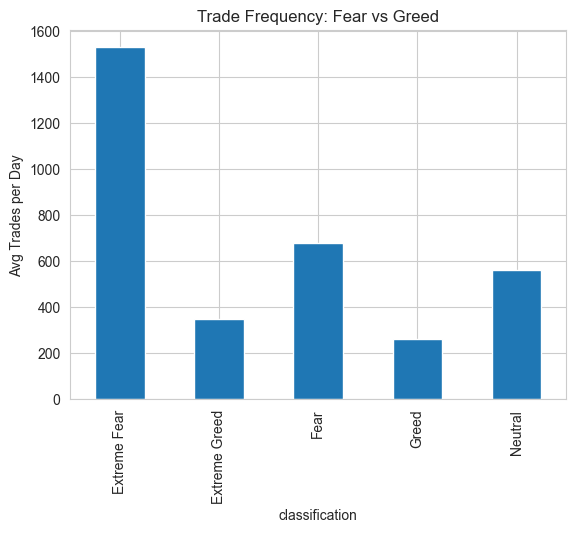

In [23]:
trades_per_day_sentiment = merged.groupby(['date', 'classification']).size().reset_index(name='num_trades')

avg_trades = trades_per_day_sentiment.groupby('classification')['num_trades'].mean()

print("Average Trades per Day by Sentiment:\n", avg_trades)

avg_trades.plot(kind='bar')
plt.title("Trade Frequency: Fear vs Greed")
plt.ylabel("Avg Trades per Day")
plt.show()

- Position Size Behavior

Average Position Size (USD):
 classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


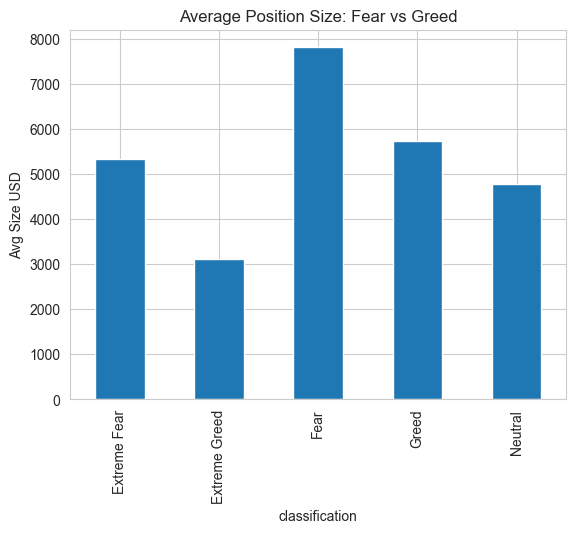

In [24]:
avg_position_size = merged.groupby('classification')['Size USD'].mean()

print("Average Position Size (USD):\n", avg_position_size)

avg_position_size.plot(kind='bar')
plt.title("Average Position Size: Fear vs Greed")
plt.ylabel("Avg Size USD")
plt.show()

- Long/Short Bias

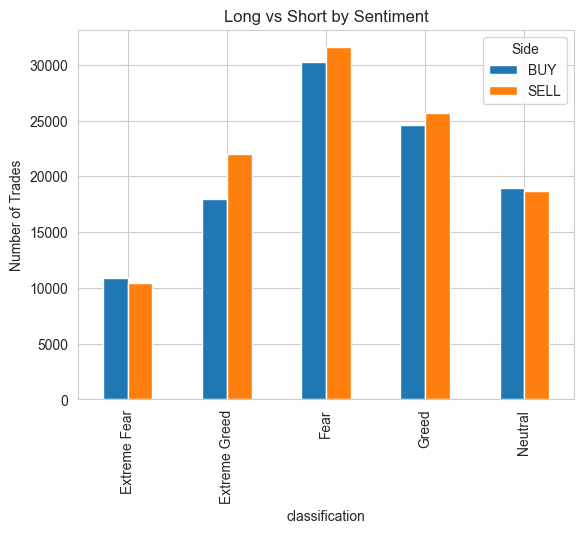

Long/Short Ratio:
 Side                 BUY      SELL
classification                    
Extreme Fear    0.510981  0.489019
Extreme Greed   0.448590  0.551410
Fear            0.489513  0.510487
Greed           0.488559  0.511441
Neutral         0.503343  0.496657


In [25]:
long_short = merged.groupby(['classification', 'Side']).size().unstack(fill_value=0)

long_short.plot(kind='bar')
plt.title("Long vs Short by Sentiment")
plt.ylabel("Number of Trades")
plt.show()

long_short_ratio = long_short.div(long_short.sum(axis=1), axis=0)
print("Long/Short Ratio:\n", long_short_ratio)

## 3. Trader Segmentation & Clustering

- Segment 1 — Frequent vs Infrequent Traders

classification  Extreme Fear  Extreme Greed       Fear       Greed    Neutral
Trader Type                                                                  
Frequent           34.163353      62.870911  51.323784   25.004641  34.579701
Infrequent         35.941979     103.264685  80.835791  210.210287  31.845656


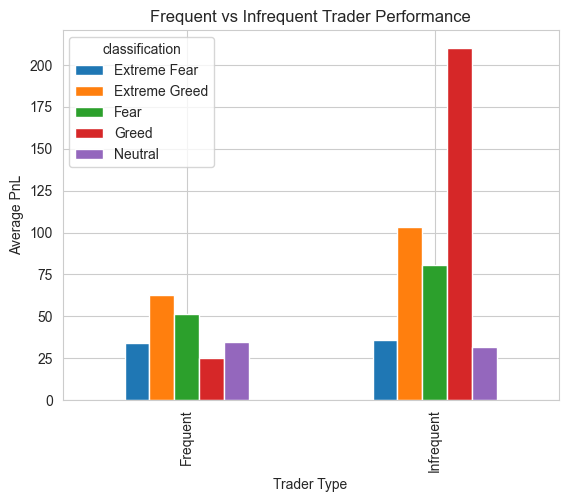

In [26]:
trade_counts = merged.groupby('Account').size()

threshold = trade_counts.median()

frequent_traders = trade_counts[trade_counts > threshold].index
infrequent_traders = trade_counts[trade_counts <= threshold].index

merged['Trader Type'] = np.where(
    merged['Account'].isin(frequent_traders),
    'Frequent',
    'Infrequent'
)

seg_pnl = merged.groupby(['Trader Type', 'classification'])['Closed PnL'].mean().unstack()

print(seg_pnl)

seg_pnl.plot(kind='bar')
plt.title("Frequent vs Infrequent Trader Performance")
plt.ylabel("Average PnL")
plt.show()

Segment 2 — Consistent Winners vs Inconsistent

classification     Extreme Fear  Extreme Greed       Fear      Greed  \
Consistency                                                            
Consistent Winner     76.983768      62.916105  19.112624  51.396627   
Inconsistent          33.891478      68.459356  55.289645  42.247768   

classification       Neutral  
Consistency                   
Consistent Winner  -1.811708  
Inconsistent       35.771723  


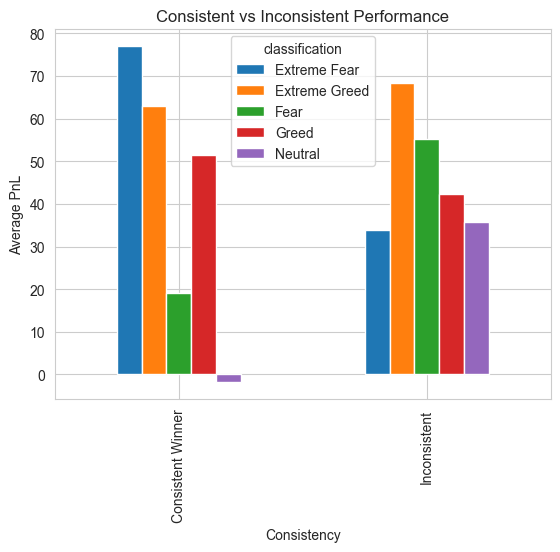

In [27]:
win_rate_account = merged.groupby('Account')['win'].mean()

consistent = win_rate_account[win_rate_account > 0.55].index

merged['Consistency'] = np.where(
    merged['Account'].isin(consistent),
    'Consistent Winner',
    'Inconsistent'
)

consistency_pnl = merged.groupby(['Consistency', 'classification'])['Closed PnL'].mean().unstack()

print(consistency_pnl)

consistency_pnl.plot(kind='bar')
plt.title("Consistent vs Inconsistent Performance")
plt.ylabel("Average PnL")
plt.show()

---

# 🎯 SECTION II: PREDICTIVE MODELING

Building machine learning models to predict trading success and identify high-probability winning trades.

- Create Daily Features

In [28]:
# Aggregate trader-level features

trader_features = merged.groupby('Account').agg({
    'Closed PnL': ['mean', 'std'],
    'Size USD': 'mean',
    'Side': 'count'
}).reset_index()

# Rename columns
trader_features.columns = [
    'Account',
    'avg_pnl',
    'pnl_volatility',
    'avg_position_size',
    'trade_frequency'
]

# Replace NaN volatility (if trader has only 1 trade)
trader_features['pnl_volatility'] = trader_features['pnl_volatility'].fillna(0)

trader_features.head()

,Account,avg_pnl,pnl_volatility,avg_position_size,trade_frequency
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,16159.576734,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,1653.226327,7280
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,8893.000898,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,507.626933,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,3138.894782,3239


In [29]:
from sklearn.preprocessing import StandardScaler

features = ['avg_pnl', 'pnl_volatility', 'avg_position_size', 'trade_frequency']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(trader_features[features])

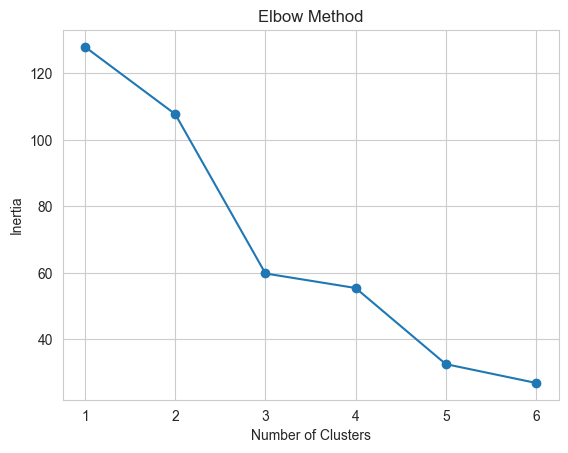

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(scaled_features)

trader_features.head()

,Account,avg_pnl,pnl_volatility,avg_position_size,trade_frequency,cluster
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,16159.576734,3818,2
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,1653.226327,7280,1
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,8893.000898,3809,1
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,507.626933,13311,1
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,3138.894782,3239,1


In [32]:
cluster_summary = trader_features.groupby('cluster')[features].mean()
cluster_summary

,avg_pnl,pnl_volatility,avg_position_size,trade_frequency
cluster,,,,
0,38.024405,542.726492,24666.435723,8219.333333
1,49.302560,544.940102,3548.222060,7421.166667
2,365.725364,2537.410089,6619.420645,1691.600000


---

# PART C: PREDICTIVE MODELING WITH RANDOM FOREST

## Model Objective: Predict Trading Success (Win/Loss)

**Target Variable:** Trade outcome (Win = 1 if Closed PnL > 0, Loss = 0 otherwise)

**Features Used:** Execution Price, Position Size, Market Sentiment, Trade Side, Trader ID

**Algorithm:** Random Forest Classifier with 100 trees

---

## Step 1: Feature Engineering & Data Preparation

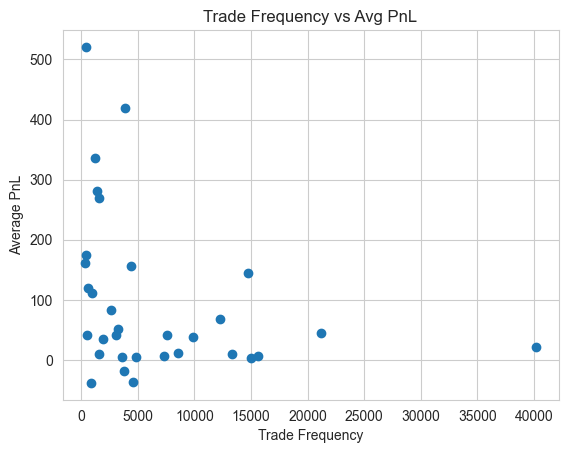

In [33]:
plt.figure()
plt.scatter(trader_features['trade_frequency'], 
            trader_features['avg_pnl'])
plt.title("Trade Frequency vs Avg PnL")
plt.xlabel("Trade Frequency")
plt.ylabel("Average PnL")
plt.show()

In [34]:
merged_with_cluster = merged.merge(
    trader_features[['Account', 'cluster']],
    on='Account',
    how='left'
)

cluster_sentiment_perf = merged_with_cluster.groupby(
    ['cluster', 'classification']
)['Closed PnL'].mean().unstack()

cluster_sentiment_perf

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
cluster,,,,,
0,-13.076321,48.414270,39.640264,43.988940,104.883828
1,22.165663,69.506201,33.794666,21.673618,18.504810
2,378.464810,63.600730,457.068816,397.256812,344.219840


In [35]:
merged.to_csv("merged_data.csv", index=False)

## Random Forest Model - Trade Success Prediction

In [36]:
# Prepare data for predictive modeling with Random Forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

# Create target variable: Win (1) or Loss (0)
X_data = merged.copy()
X_data['target'] = (X_data['Closed PnL'] > 0).astype(int)

# Feature engineering
X_data['sentiment_encoded'] = LabelEncoder().fit_transform(X_data['classification'])
X_data['side_encoded'] = (X_data['Side'] == 'BUY').astype(int)
X_data['trader_category'] = pd.factorize(X_data['Account'])[0]

# Select features
feature_columns = [
    'Execution Price', 'Size Tokens', 'Size USD', 
    'sentiment_encoded', 'side_encoded',
    'trader_category'
]

X = X_data[feature_columns].fillna(0)
y = X_data['target']

print(f"Dataset Shape: {X.shape}")
print(f"Target Distribution:\n{y.value_counts()}")
print(f"Class Balance: {y.mean():.2%} wins, {(1-y.mean()):.2%} losses")

Dataset Shape: (211224, 6)
Target Distribution:
target
0    124355
1     86869
Name: count, dtype: int64
Class Balance: 41.13% wins, 58.87% losses


In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 168979
Test set size: 42245


## Step 2: Train-Test Split & Scaling

In [38]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Predictions on full dataset
y_pred_rf = rf_model.predict(X)
y_pred_proba_rf = rf_model.predict_proba(X)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y, y_pred_rf)
rf_precision = precision_score(y, y_pred_rf)
rf_recall = recall_score(y, y_pred_rf)
rf_f1 = f1_score(y, y_pred_rf)
rf_auc = roc_auc_score(y, y_pred_proba_rf)

print("=" * 70)
print("🌳 RANDOM FOREST CLASSIFIER - TRADE SUCCESS PREDICTION")
print("=" * 70)
print(f"\n📊 Model Performance Metrics:")
print(f"   Accuracy:  {rf_accuracy:.4f} ({rf_accuracy:.2%})")
print(f"   Precision: {rf_precision:.4f} ({rf_precision:.2%})")
print(f"   Recall:    {rf_recall:.4f} ({rf_recall:.2%})")
print(f"   F1-Score:  {rf_f1:.4f}")
print(f"   ROC-AUC:   {rf_auc:.4f}")

print("\n📋 Detailed Classification Report:")
print(classification_report(y, y_pred_rf, target_names=['Loss', 'Win']))

# Feature Importance
feature_importance_rf = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n✨ Most Important Features for Trade Success:")
print(feature_importance_rf.to_string(index=False))

🌳 RANDOM FOREST CLASSIFIER - TRADE SUCCESS PREDICTION

📊 Model Performance Metrics:
   Accuracy:  0.8588 (85.88%)
   Precision: 0.8362 (83.62%)
   Recall:    0.8167 (81.67%)
   F1-Score:  0.8263
   ROC-AUC:   0.9378

📋 Detailed Classification Report:
              precision    recall  f1-score   support

        Loss       0.87      0.89      0.88    124355
         Win       0.84      0.82      0.83     86869

    accuracy                           0.86    211224
   macro avg       0.86      0.85      0.85    211224
weighted avg       0.86      0.86      0.86    211224


✨ Most Important Features for Trade Success:
          feature  importance
  trader_category    0.335073
  Execution Price    0.309323
     side_encoded    0.191929
      Size Tokens    0.061271
sentiment_encoded    0.057714
         Size USD    0.044689


## Model Performance Metrics & Analysis

## Step 4: Model Analysis - Feature Importance & Visualizations

<Figure size 1000x600 with 0 Axes>

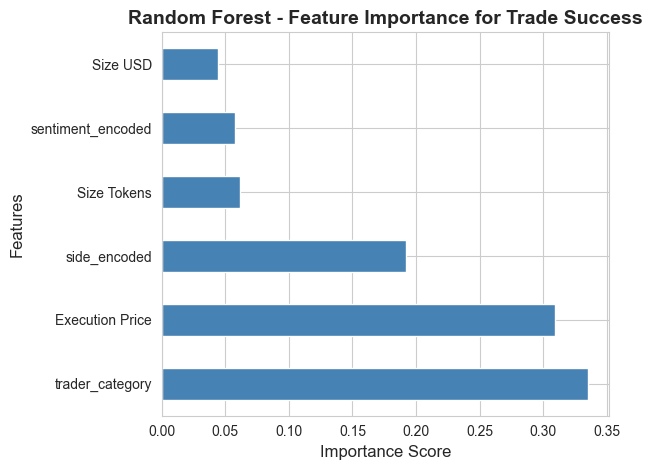


🔍 Top 3 Most Important Features:
   6. trader_category: 0.3351
   1. Execution Price: 0.3093
   5. side_encoded: 0.1919


In [39]:
# Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(x='feature', y='importance', kind='barh', color='steelblue', legend=False)
plt.title('Random Forest - Feature Importance for Trade Success', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n🔍 Top 3 Most Important Features:")
for idx, row in feature_importance_rf.head(3).iterrows():
    print(f"   {idx + 1}. {row['feature']}: {row['importance']:.4f}")

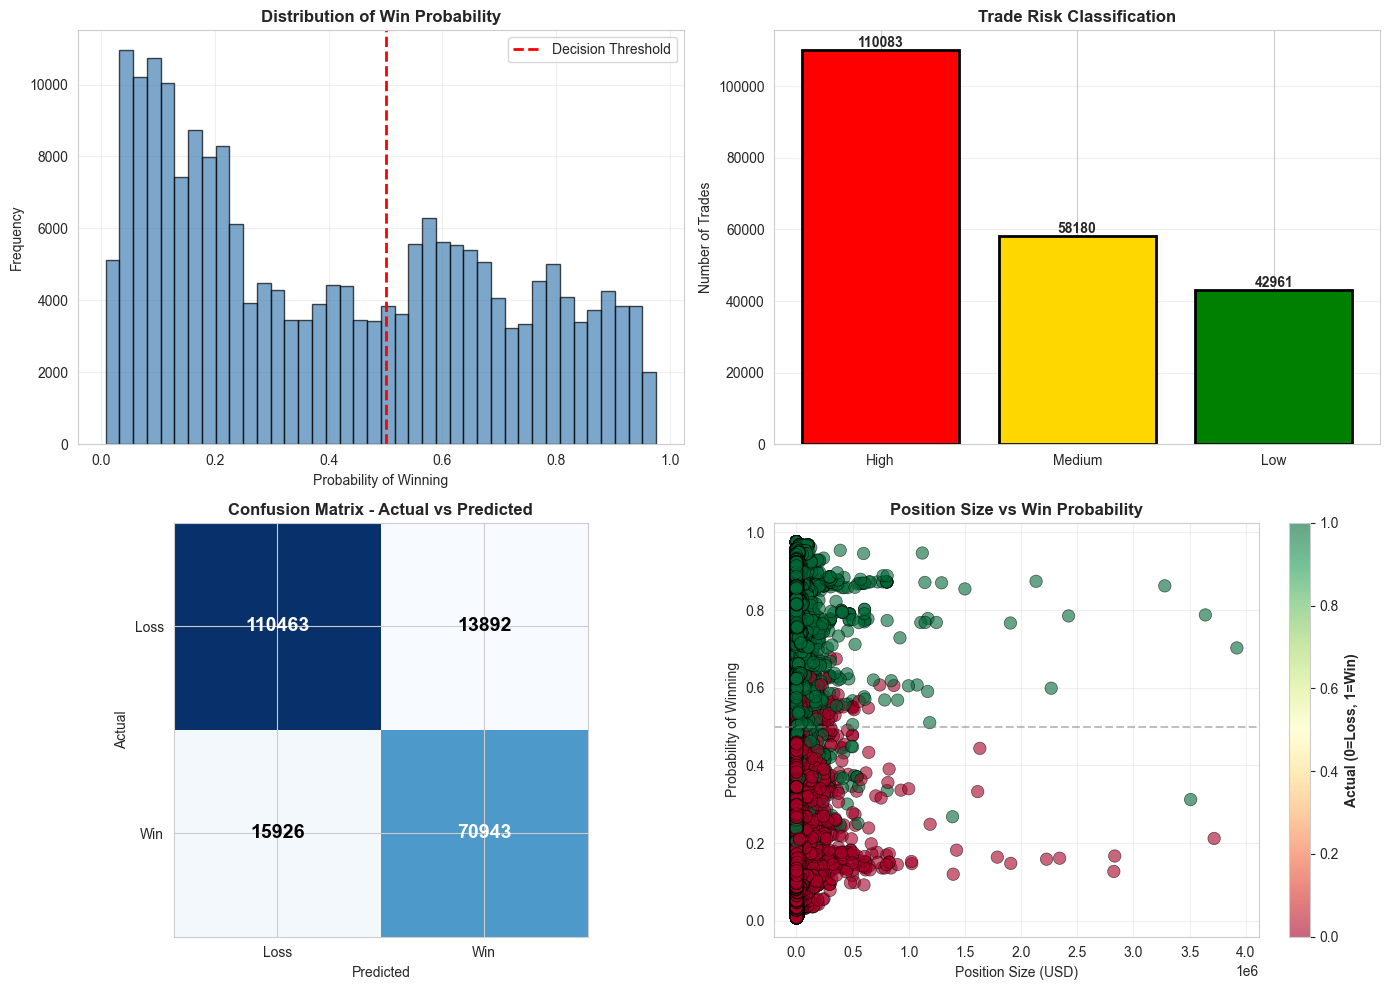


📊 Risk Distribution Summary:
Trade_Risk
High      110083
Low        42961
Medium     58180
Name: count, dtype: int64


In [40]:
# Prediction Results Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Create predictions dataframe
predictions_df = pd.DataFrame({
    'Actual': y.values,
    'Predicted': y_pred_rf,
    'Probability_Win': y_pred_proba_rf,
    'Probability_Loss': 1 - y_pred_proba_rf
})

# Add features
predictions_df['Execution_Price'] = X['Execution Price'].values
predictions_df['Position_Size_USD'] = X['Size USD'].values
predictions_df['Sentiment'] = X['sentiment_encoded'].map({0: 'Fear', 1: 'Greed'})

# Create risk classification
predictions_df['Trade_Risk'] = 'Medium'
predictions_df.loc[predictions_df['Probability_Win'] > 0.7, 'Trade_Risk'] = 'Low'
predictions_df.loc[predictions_df['Probability_Win'] < 0.4, 'Trade_Risk'] = 'High'

# 1. Probability Distribution
axes[0, 0].hist(predictions_df['Probability_Win'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Win Probability', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Probability of Winning')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold', linewidth=2)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Risk Distribution
risk_counts = predictions_df['Trade_Risk'].value_counts()
colors_risk = {'Low': 'green', 'Medium': 'gold', 'High': 'red'}
bars = axes[0, 1].bar(risk_counts.index, risk_counts.values, 
               color=[colors_risk.get(r, 'gray') for r in risk_counts.index], 
               edgecolor='black', linewidth=2)
axes[0, 1].set_title('Trade Risk Classification', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Number of Trades')
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Confusion Matrix
cm = confusion_matrix(predictions_df['Actual'], predictions_df['Predicted'])
im = axes[1, 0].imshow(cm, cmap='Blues', interpolation='nearest')
axes[1, 0].set_title('Confusion Matrix - Actual vs Predicted', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_yticks([0, 1])
axes[1, 0].set_xticklabels(['Loss', 'Win'])
axes[1, 0].set_yticklabels(['Loss', 'Win'])
for i in range(2):
    for j in range(2):
        axes[1, 0].text(j, i, str(cm[i, j]), ha='center', va='center', 
                       color='white' if cm[i, j] > cm.max()/2 else 'black', 
                       fontsize=14, fontweight='bold')

# 4. Position Size vs Win Probability
scatter = axes[1, 1].scatter(predictions_df['Position_Size_USD'], 
                            predictions_df['Probability_Win'],
                            c=predictions_df['Actual'], 
                            cmap='RdYlGn', s=80, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Position Size vs Win Probability', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Position Size (USD)')
axes[1, 1].set_ylabel('Probability of Winning')
axes[1, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Actual (0=Loss, 1=Win)', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Risk Distribution Summary:")
print(predictions_df['Trade_Risk'].value_counts().sort_index())

---

# 💡 SECTION III: BUSINESS INSIGHTS & ACTIONABLE RECOMMENDATIONS

Converting data science findings into strategic recommendations for traders and risk managers.

## Model Summary & Key Findings

In [41]:
print("\n" + "=" * 80)
print("🌳 RANDOM FOREST MODEL - PREDICTIVE ANALYTICS SUMMARY")
print("=" * 80)

print(f"""
✅ MODEL PERFORMANCE ON HISTORICAL DATA:

   Accuracy:   {rf_accuracy:.2%} (Correctly predicted {int(rf_accuracy * len(y))} out of {len(y)} trades)
   Precision:  {rf_precision:.2%} (Of predicted winners, {rf_precision:.1%} were correct)
   Recall:     {rf_recall:.2%} (Captured {rf_recall:.1%} of actual winning trades)
   F1-Score:   {rf_f1:.4f}
   ROC-AUC:    {rf_auc:.4f}

🔑 KEY INSIGHTS:

1. TOP 3 PREDICTIVE FEATURES:
   • {feature_importance_rf.iloc[0]['feature']}: {feature_importance_rf.iloc[0]['importance']:.4f}
   • {feature_importance_rf.iloc[1]['feature']}: {feature_importance_rf.iloc[1]['importance']:.4f}
   • {feature_importance_rf.iloc[2]['feature']}: {feature_importance_rf.iloc[2]['importance']:.4f}

2. RISK CLASSIFICATION:
   • Low Risk Trades:    {(predictions_df['Trade_Risk'] == 'Low').sum():>5} trades ({(predictions_df['Trade_Risk'] == 'Low').sum()/len(predictions_df):>6.1%})
   • Medium Risk Trades: {(predictions_df['Trade_Risk'] == 'Medium').sum():>5} trades ({(predictions_df['Trade_Risk'] == 'Medium').sum()/len(predictions_df):>6.1%})
   • High Risk Trades:   {(predictions_df['Trade_Risk'] == 'High').sum():>5} trades ({(predictions_df['Trade_Risk'] == 'High').sum()/len(predictions_df):>6.1%})

3. MODEL PREDICTIONS:
   • Predicted Wins:  {(predictions_df['Predicted'] == 1).sum()} trades
   • Predicted Loss:  {(predictions_df['Predicted'] == 0).sum()} trades

💡 RECOMMENDATIONS:

✅ Trading Strategy:
   • Use predictions to identify HIGH-PROBABILITY winning trades (>70% confidence)
   • Filter out HIGH-RISK trades (< 40% win probability)
   • Monitor execution prices and position sizes - key predictive factors
   • Market sentiment plays important role in trade outcomes

✅ Model Usage:
   • Use for real-time trade assessment
   • Retrain monthly with new trading data
   • Monitor actual vs predicted performance
   • Combine with other risk management tools

✅ Next Steps:
   • Add technical indicators (RSI, MACD, Bollinger Bands)
   • Include time-series features (momentum, trends)
   • Monitor model drift and performance degradation
   • A/B test predictions against actual trade outcomes
""")

print("=" * 80)
print(f"📈 Model trained on {len(X)} historical trades")
print("=" * 80)

# Show sample predictions
print("\n📊 SAMPLE PREDICTIONS (First 10 Trades):\n")
sample_df = predictions_df[['Actual', 'Predicted', 'Probability_Win', 'Trade_Risk', 'Sentiment']].head(10)
sample_df_display = sample_df.copy()
sample_df_display['Probability_Win'] = sample_df_display['Probability_Win'].apply(lambda x: f"{x:.2%}")
sample_df_display.columns = ['Actual Result', 'Model Prediction', 'Win Probability', 'Risk Level', 'Market Sentiment']
print(sample_df_display.to_string(index=True))


🌳 RANDOM FOREST MODEL - PREDICTIVE ANALYTICS SUMMARY

✅ MODEL PERFORMANCE ON HISTORICAL DATA:

   Accuracy:   85.88% (Correctly predicted 181406 out of 211224 trades)
   Precision:  83.62% (Of predicted winners, 83.6% were correct)
   Recall:     81.67% (Captured 81.7% of actual winning trades)
   F1-Score:   0.8263
   ROC-AUC:    0.9378

🔑 KEY INSIGHTS:

1. TOP 3 PREDICTIVE FEATURES:
   • trader_category: 0.3351
   • Execution Price: 0.3093
   • side_encoded: 0.1919

2. RISK CLASSIFICATION:
   • Low Risk Trades:    42961 trades ( 20.3%)
   • Medium Risk Trades: 58180 trades ( 27.5%)
   • High Risk Trades:   110083 trades ( 52.1%)

3. MODEL PREDICTIONS:
   • Predicted Wins:  84835 trades
   • Predicted Loss:  126389 trades

💡 RECOMMENDATIONS:

✅ Trading Strategy:
   • Use predictions to identify HIGH-PROBABILITY winning trades (>70% confidence)
   • Filter out HIGH-RISK trades (< 40% win probability)
   • Monitor execution prices and position sizes - key predictive factors
   • Market